In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [3]:
# Load the trained model
model = load_model("simswap_xception.h5")
print("✅ Model loaded successfully.")




✅ Model loaded successfully.


In [4]:
def predict_image(image_path, model, target_size=(256, 256)):
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt
    from tensorflow.keras.preprocessing.image import load_img, img_to_array

    if model is None:
        print("❌ Please load a model before calling this function.")
        return

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Load original image
    original = cv2.imread(image_path)
    if original is None:
        print("🚫 Could not load image.")
        return

    image = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    # If face(s) found → crop largest face
    if len(faces) > 0:
        (x, y, w, h) = max(faces, key=lambda box: box[2] * box[3])
        face = original[y:y+h, x:x+w]
        resized = cv2.resize(face, target_size)
    else:
        # Assume image is already cropped
        resized = cv2.resize(original, target_size)
        x, y, w, h = 0, 0, original.shape[1], original.shape[0]  # full image box

    # Prepare for prediction
    face_array = resized / 255.0
    face_array = np.expand_dims(face_array, axis=0)

    pred = model.predict(face_array)[0][0]
    label = 'Real' if pred > 0.5 else 'Fake'
    confidence = pred if pred > 0.5 else 1 - pred
    color = (0, 255, 0) if label == 'Real' else (255, 0, 0)  # green or red in RGB

    # Draw bounding box only if face was found
    if len(faces) > 0:
        cv2.rectangle(image, (x, y), (x+w, y+h), color, 2)
        cv2.putText(image, f"{label} ({confidence:.2f})", (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2, cv2.LINE_AA)

    # Show the result
    plt.imshow(image)
    plt.title(f"{label} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()


In [5]:
def predict_video(video_path="", model=None, target_size=(256, 256)):
    import cv2
    import numpy as np

    if model is None:
        print("❌ Please load a model before calling this function.")
        return

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    cap = cv2.VideoCapture(video_path if video_path else 0)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("🚫 Unable to read video stream.")
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

        if len(faces) > 0:
            # Select the largest face
            (x, y, w, h) = max(faces, key=lambda box: box[2] * box[3])
            face = frame[y:y+h, x:x+w]
            resized_face = cv2.resize(face, target_size)
            face_array = resized_face / 255.0
            face_array = np.expand_dims(face_array, axis=0)

            pred = model.predict(face_array)[0][0]
            label = 'Real' if pred > 0.5 else 'Fake'
            confidence = pred if pred > 0.5 else 1 - pred

            # Set color: green for Real, red for Fake
            color = (0, 255, 0) if label == 'Real' else (0, 0, 255)

            cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
            cv2.putText(frame, f"{label} ({confidence:.2f})", (x, y-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

        # Show the result
        cv2.imshow('Real-Time Face Prediction', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


In [6]:
#predict_video(r'C:\Users\USER\Desktop\uni\Machine Learning\final project\deepfake detection\faceguard_ai\videos\maroun_20250404_212748.avi',model)
predict_video('./output/demo.mp4',model)

1/1 [==============================] - 0s 146ms/step
🚫 Unable to read video stream.


1/1 [==============================] - 0s 115ms/step


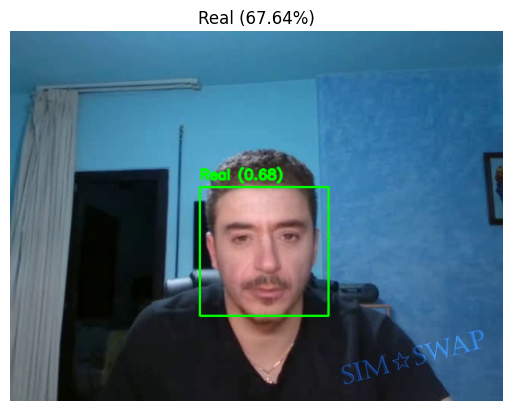

In [9]:
predict_image(r'./temp_results/frame_0000006.jpg',model)